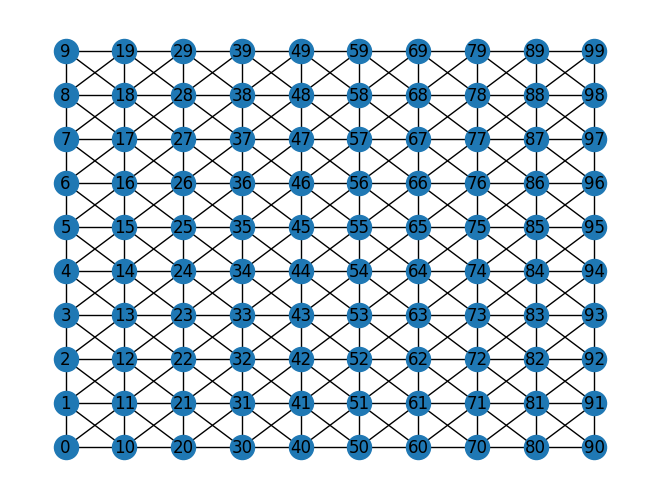

In [2]:
# Base Code

import networkx as nx
import matplotlib.pyplot as plt

# Get a 2d grid
N = 10
G = nx.grid_2d_graph(N, N)

# get labels positions and labels
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i*10+j) for i,j in G.nodes())

# Add diagonal labels
for u,v in G.nodes():
    if(u+1 < N and v+1 < N):
        G.add_edge((u, v), (u+1, v+1))
    if(u+1 < N and v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

# draw the graph
nx.draw(G, pos, with_labels=True, labels=labels)

In [3]:
import random

# Assign random types to nodes
# Type 0 - empty cell
# Type 1 & 2 are types of people

for n in G.nodes():
    G.nodes[n]['type'] = random.randint(0, 2)

In [4]:
# Keep lists for types
empty_cells = [n for (n,d) in G.nodes(data=True) if d['type'] == 0]
type1_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 1]
type2_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 2]

In [5]:
print("Empty cells: ", empty_cells)
print("Type 1: ", type1_nodeList)
print("Type 2: ", type2_nodeList)

Empty cells:  [(0, 0), (0, 3), (0, 4), (0, 5), (1, 2), (1, 7), (2, 1), (2, 3), (3, 5), (3, 7), (4, 2), (4, 3), (4, 4), (5, 7), (5, 9), (6, 5), (7, 1), (7, 3), (7, 5), (7, 9), (8, 3), (8, 8), (9, 2), (9, 5), (9, 8)]
Type 1:  [(0, 7), (0, 8), (0, 9), (1, 1), (1, 4), (1, 6), (2, 2), (2, 8), (3, 0), (3, 6), (3, 8), (3, 9), (4, 1), (4, 9), (5, 1), (5, 3), (5, 4), (5, 5), (5, 6), (5, 8), (6, 1), (6, 2), (6, 3), (6, 9), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 4), (8, 5), (8, 7), (9, 0), (9, 1), (9, 4), (9, 6), (9, 7)]
Type 2:  [(0, 1), (0, 2), (0, 6), (1, 0), (1, 3), (1, 5), (1, 8), (1, 9), (2, 0), (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 2), (6, 0), (6, 4), (6, 6), (6, 7), (6, 8), (7, 0), (7, 2), (7, 4), (8, 6), (8, 9), (9, 3), (9, 9)]


In [10]:
def display_graph(G):
    nodes_b = nx.draw_networkx_nodes(G, pos, node_color='blue', nodelist=type1_nodeList, edgecolors='black')
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color='red', nodelist=type2_nodeList, edgecolors='black')
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color='white', nodelist=empty_cells, edgecolors='black')
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels=labels)
    plt.show()

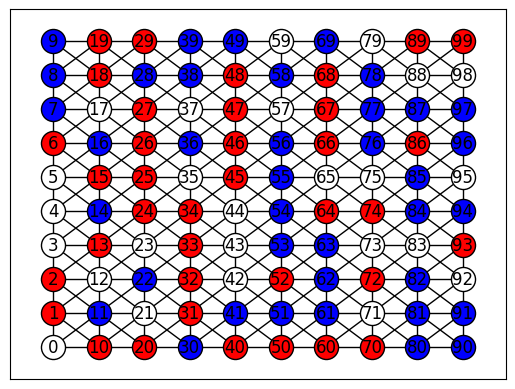

In [11]:
display_graph(G)

In [17]:
# get boundary nodes function
def get_boundary_nodes(G):
    boundary_node_list = []

    for u,v in G.nodes():
        if(u == 0 or u == N-1 or v == 0 or v == N-1):
            boundary_node_list.append((u,v))

    return boundary_node_list

In [19]:
boundary_nodes = get_boundary_nodes(G)
internal_nodes = [(u,v) for (u,v) in G.nodes() if (u,v) not in boundary_nodes]

In [20]:
print("Boundary nodes: ", boundary_nodes)
print("Internal nodes: ", internal_nodes)

Boundary nodes:  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 9), (2, 0), (2, 9), (3, 0), (3, 9), (4, 0), (4, 9), (5, 0), (5, 9), (6, 0), (6, 9), (7, 0), (7, 9), (8, 0), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
Internal nodes:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]
